In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Read .csv file and split it to 2 np array:

date contain the date of samples

data contain the features of samples

In [2]:
np.random.seed(69)
random_state = 69

In [3]:
path = "/content/drive/MyDrive/SE355/DoAn/Data/test_data.csv"
df = pd.read_csv(path)
df.head()
date = df.iloc[:, 0:1].to_numpy()
data = df.iloc[:, 1:-3].to_numpy().astype(np.float32)
predict_rain = df.iloc[:, -3].to_numpy().flatten().astype(np.int8)
predict_heat = df.iloc[:, -2].to_numpy().flatten().astype(np.int8)
predict_cloud = df.iloc[:, -1].to_numpy().flatten().astype(np.int8)

# Plot label's distribution

[0 1] [20869  3779]


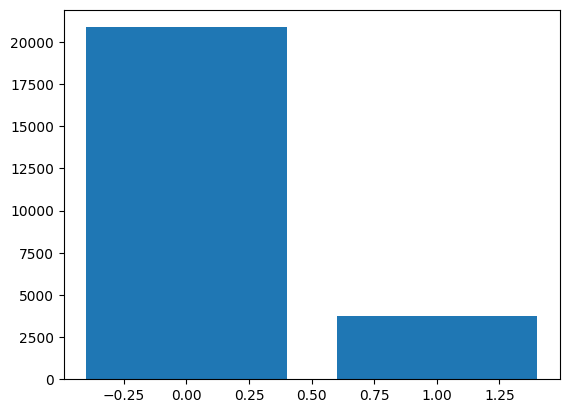

[0 1] [16643  8005]


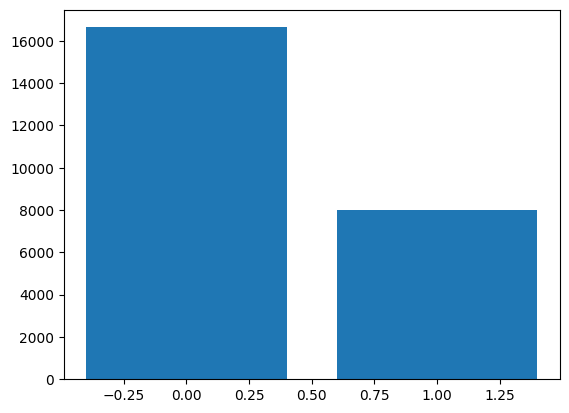

[0 1 2] [20979  2118  1551]


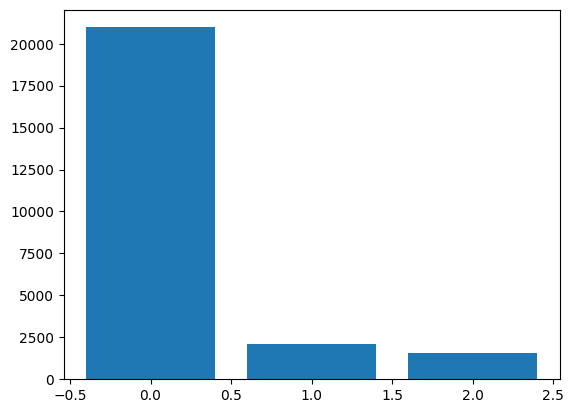

In [7]:
#labels: list of data points' label
#use to plot the number of each label
def plot_labels(labels):
  unique_labels, counts = np.unique(labels, return_counts=True)
  print(unique_labels, counts)
  plt.bar(unique_labels, counts)
  plt.show()

plot_labels(predict_rain)
plot_labels(predict_cloud)
plot_labels(predict_heat)

In [23]:
3779/20869

0.18108198763716518

In [4]:
#labels: list of data points'label
#return the data points' index after undersampling
def undersampling(labels):
  unique_labels, counts = np.unique(labels, return_counts=True)
  min_size = min(counts)
  final_indices = []
  for la in unique_labels:
    indices = np.where(labels==la)
    indices = np.random.choice(indices[0], size=min_size)
    final_indices.append(indices)
  return np.array(final_indices).flatten()

# Rain predict model

In [5]:
idx = undersampling(predict_rain)
rain_data, rain_labels = data[idx], predict_rain[idx]

[0 1] [3779 3779]


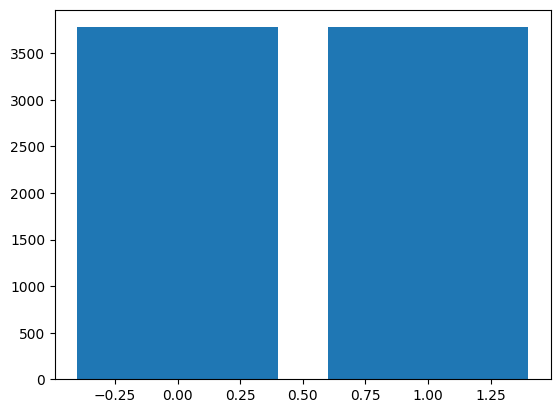

In [8]:
#data point after undersampling
plot_labels(rain_labels)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(rain_data, rain_labels, train_size=0.8, random_state=random_state)

choose the number of component to extract with pca

In [ ]:
numbers = [10, 50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]
info_ratio = []
for n in numbers:
  pca = PCA(n_components=n)
  pca.fit(X_train)
  info_ratio.append(sum(pca.explained_variance_ratio_))

KeyboardInterrupt: ignored

In [14]:
numbers = [10, 50, 100, 200, 500, 1000, 2000, 3000, 4000]

In [18]:
info_ratio = [0.3244775803759694,
 0.5152207068167627,
 0.6274218398611993,
 0.734519753663335,
 0.8659822312474716,
 0.9456921817472903,
 0.9923077647799801,
 0.9993621863479802,
 0.999942010548267]

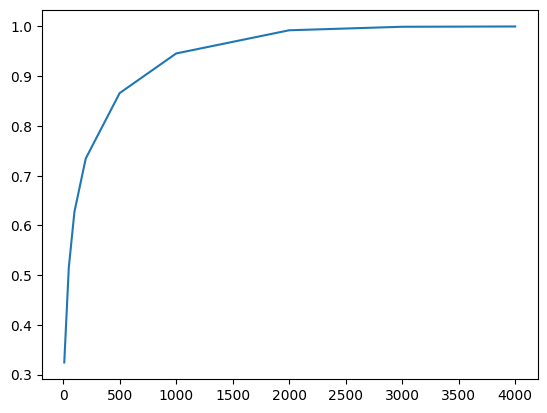

In [19]:
plt.plot(numbers, info_ratio)

In [ ]:
plt.plot(numbers[:9], info_ratio[:9])

In [20]:
pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train).astype(np.float32)
X_test_pca = pca.transform(X_test).astype(np.float32)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

scaler = StandardScaler(with_mean=False, with_std=False)
X_train_scaled_01 = scaler.fit_transform(X_train_pca)
X_test_scaled_01 = scaler.transform(X_test_pca)

In [21]:
logis = LogisticRegression()
logis.fit(X_train_scaled, Y_train)
logis_train_pred = logis.predict(X_train_scaled)
print(confusion_matrix(Y_train, logis_train_pred))
logis_test_pred = logis.predict(X_test_scaled)
print(confusion_matrix(Y_test, logis_test_pred))
print("F1 score:", f1_score(Y_test, logis_test_pred))

[[2370  647]
 [ 518 2511]]
[[552 210]
 [182 568]]
F1 score: 0.743455497382199


In [24]:
def svc_with_kernel(kernel, X_train, X_test, Y_train, Y_test):
  svc = SVC(kernel= kernel)
  svc.fit(X_train, Y_train)
  svc_train_pred = svc.predict(X_train)
  print(confusion_matrix(Y_train, svc_train_pred))
  svc_test_pred = svc.predict(X_test)
  print(confusion_matrix(Y_test, svc_test_pred))
  print("F1 score:", f1_score(Y_test, svc_test_pred, average="micro"))

In [25]:
svc_with_kernel("rbf", X_train_scaled_01, X_test_scaled_01, Y_train, Y_test)

[[2663  354]
 [ 183 2846]]
[[601 161]
 [115 635]]
F1 score: 0.8174603174603176


In [26]:
ran_forest = RandomForestClassifier(n_estimators=170, max_depth=22, random_state=random_state)
ran_forest.fit(X_train_scaled, Y_train)
rf_train_pred = ran_forest.predict(X_train_scaled)
print(confusion_matrix(Y_train, rf_train_pred))
rf_test_pred = ran_forest.predict(X_test_scaled)
print(confusion_matrix(Y_test, rf_test_pred))
print("F1 score:", f1_score(Y_test, rf_test_pred))

[[3017    0]
 [   0 3029]]
[[649 113]
 [137 613]]
F1 score: 0.8306233062330624


plot the rain data point with pca

In [ ]:
plot_pca = PCA(n_components=2)
plot_pca.fit(rain_data)
plot_data = plot_pca.transform(rain_data)

In [ ]:
def VisualizingDataset(X_, Y_):
  X1 = X_[:, 0]
  X2 = X_[:, 1]
  for i, label in enumerate(np.unique(Y_)):
    plt.scatter(X1[Y_ == label], X2[Y_ == label])
  plt.show()

In [ ]:
VisualizingDataset(plot_data, rain_labels)

# Heat predict model

In [27]:
idx = undersampling(predict_heat)
heat_data, heat_labels = data[idx], predict_heat[idx]

[0 1 2] [1551 1551 1551]


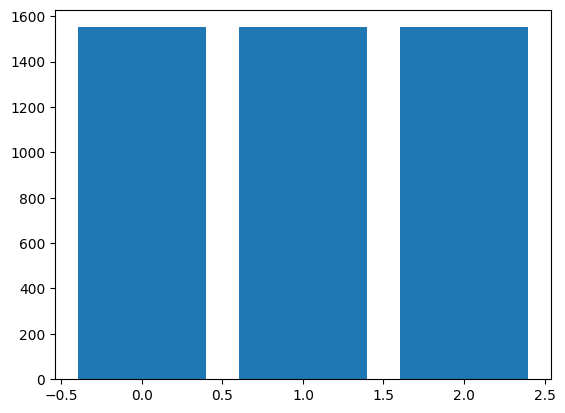

In [28]:
#data point after undersampling
plot_labels(heat_labels)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(heat_data, heat_labels, train_size=0.8, random_state=random_state)

choose the number of component to extract with pca

In [ ]:
numbers = [10, 50, 100, 200, 500, 1000, 2000, 3000]
info_ratio = []
for n in numbers:
  pca = PCA(n_components=n)
  pca.fit(X_train)
  info_ratio.append(sum(pca.explained_variance_ratio_))

In [ ]:
print(info_ratio)

[0.352560811676085, 0.5472714032512158, 0.6591305065667257, 0.7704329893458635, 0.903723253402859, 0.9720344025008671, 0.9984034524604795, 0.9999999988013079]


In [ ]:
info_ratio = [0.352560811676085, 0.5472714032512158, 0.6591305065667257, 0.7704329893458635, 0.903723253402859, 0.9720344025008671, 0.9984034524604795, 0.9999999988013079]

[0.3244775803759694,
 0.5152207068167627,
 0.6274218398611993,
 0.734519753663335,
 0.8659822312474716,
 0.9456921817472903,
 0.9923077647799801,
 0.9993621863479802,
 0.999942010548267,
 0.9999967958738667,
 1.0000002388094174,
 0.9999999632332923,
 0.9999999632337364]

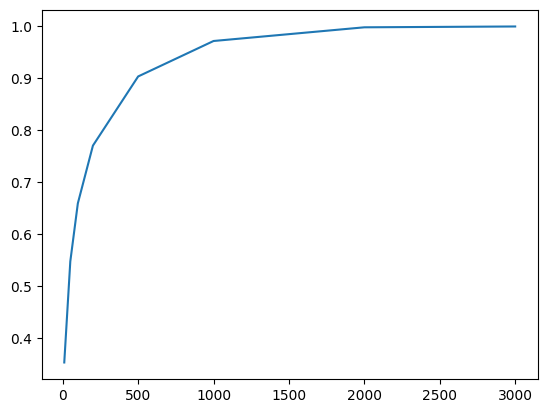

In [ ]:
plt.plot(numbers, info_ratio)

In [30]:
pca = PCA(n_components=350)
X_train_pca = pca.fit_transform(X_train).astype(np.float32)
X_test_pca = pca.transform(X_test).astype(np.float32)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

scaler = StandardScaler(with_mean=False, with_std=False)
X_train_scaled_01 = scaler.fit_transform(X_train_pca)
X_test_scaled_01 = scaler.transform(X_test_pca)

In [31]:
logis = LogisticRegression()
logis.fit(X_train_scaled, Y_train)
logis_train_pred = logis.predict(X_train_scaled)
print(confusion_matrix(Y_train, logis_train_pred))
logis_test_pred = logis.predict(X_test_scaled)
print(confusion_matrix(Y_test, logis_test_pred))
print("F1 score:", f1_score(Y_test, logis_test_pred, average="micro"))

[[1109   82   37]
 [  70  953  219]
 [   7  194 1051]]
[[255  56  12]
 [ 40 188  81]
 [  1  77 221]]
F1 score: 0.7132116004296455


In [32]:
svc_with_kernel("rbf", X_train_scaled_01, X_test_scaled_01, Y_train, Y_test)

[[1136   63   29]
 [   7 1051  184]
 [   2   76 1174]]
[[244  66  13]
 [ 23 211  75]
 [  1  39 259]]
F1 score: 0.7669172932330828


In [33]:
ran_forest = RandomForestClassifier(n_estimators=170, max_depth=22, random_state=random_state)
ran_forest.fit(X_train_scaled, Y_train)
rf_train_pred = ran_forest.predict(X_train_scaled)
print(confusion_matrix(Y_train, rf_train_pred))
rf_test_pred = ran_forest.predict(X_test_scaled)
print(confusion_matrix(Y_test, rf_test_pred))
print("F1 score:", f1_score(Y_test, rf_test_pred, average="micro"))

[[1228    0    0]
 [   0 1242    0]
 [   0    0 1252]]
[[275  40   8]
 [ 40 222  47]
 [ 14  25 260]]
F1 score: 0.8131041890440388


plot the heat data point with pca

In [ ]:
plot_pca = PCA(n_components=2)
plot_data = plot_pca.fit_transform(heat_data)

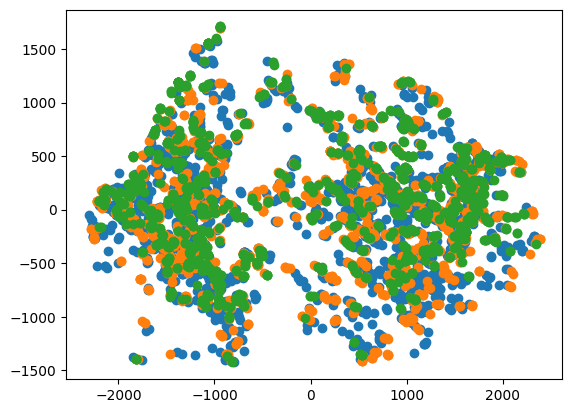

In [ ]:
VisualizingDataset(plot_data, heat_labels)

# Predict cloud cover

In [ ]:
idx = undersampling(predict_cloud)
cloud_data, cloud_labels = data[idx], predict_cloud[idx]

[0 1] [8005, 8005]


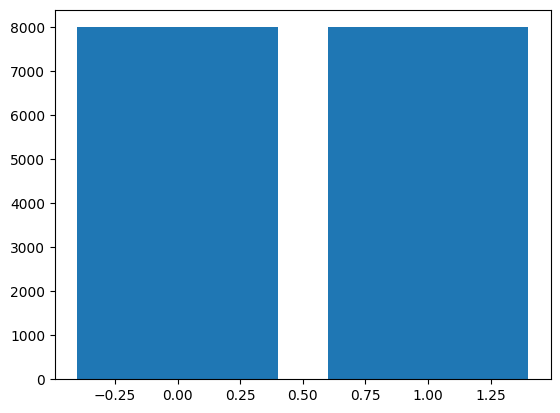

In [ ]:
#data point after undersampling
plot_labels(cloud_labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(cloud_data, cloud_labels, train_size=0.8, random_state=random_state)

choose the number of component to extract with pca

In [ ]:
numbers = [10, 50, 100, 200, 500, 1000, 2000, 3000, 4000]
info_ratio = []
for n in numbers:
  pca = PCA(n_components=n)
  pca.fit(X_train)
  info_ratio.append(sum(pca.explained_variance_ratio_))

In [ ]:
print(info_ratio)

[0.32557917200028896, 0.519470531726256, 0.6327587414998561, 0.7413287366507575, 0.8741259582457133, 0.9517678496995359, 0.993821409812881, 0.9995279015609526, 0.9999620209099831]


In [ ]:
info_ratio = [0.32557917200028896, 0.519470531726256, 0.6327587414998561, 0.7413287366507575, 0.8741259582457133, 0.9517678496995359, 0.993821409812881, 0.9995279015609526, 0.9999620209099831]

[0.3244775803759694,
 0.5152207068167627,
 0.6274218398611993,
 0.734519753663335,
 0.8659822312474716,
 0.9456921817472903,
 0.9923077647799801,
 0.9993621863479802,
 0.999942010548267,
 0.9999967958738667,
 1.0000002388094174,
 0.9999999632332923,
 0.9999999632337364]

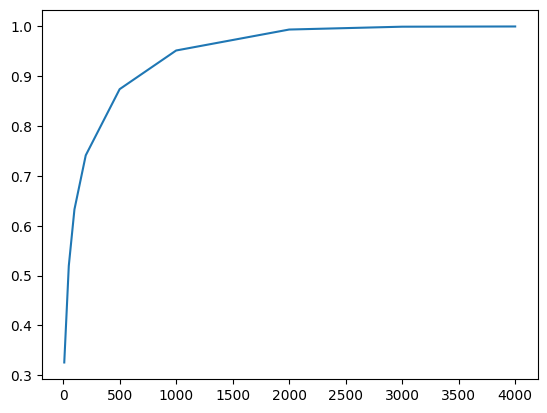

In [ ]:
plt.plot(numbers, info_ratio)

In [ ]:
pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train).astype(np.float32)
X_test_pca = pca.transform(X_test).astype(np.float32)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

scaler = StandardScaler(with_mean=False, with_std=False)
X_train_scaled_01 = scaler.fit_transform(X_train_pca)
X_test_scaled_01 = scaler.transform(X_test_pca)

In [ ]:
logis = LogisticRegression()
logis.fit(X_train_scaled, Y_train)
logis_train_pred = logis.predict(X_train_scaled)
print(confusion_matrix(Y_train, logis_train_pred))
logis_test_pred = logis.predict(X_test_scaled)
print(confusion_matrix(Y_test, logis_test_pred))
print("F1 score:", f1_score(Y_test, logis_test_pred, average="micro"))

[[4694 1707]
 [1635 4772]]
[[1153  451]
 [ 442 1156]]
F1 score: 0.7211118051217988


In [ ]:
svc_with_kernel("rbf", X_train_scaled_01, X_test_scaled_01, Y_train, Y_test)

[[5666  735]
 [ 661 5746]]
[[1320  284]
 [ 279 1319]]
F1 score: 0.8241723922548407


In [ ]:
ran_forest = RandomForestClassifier(n_estimators=170, max_depth=22, random_state=random_state)
ran_forest.fit(X_train_scaled, Y_train)
rf_train_pred = ran_forest.predict(X_train_scaled)
print(confusion_matrix(Y_train, rf_train_pred))
rf_test_pred = ran_forest.predict(X_test_scaled)
print(confusion_matrix(Y_test, rf_test_pred))
print("F1 score:", f1_score(Y_test, rf_test_pred, average="micro"))

[[6401    0]
 [   0 6407]]
[[1425  179]
 [ 231 1367]]
F1 score: 0.8719550281074329


plot the cloud cover data point with pca

In [ ]:
plot_pca = PCA(n_components=2)
plot_data = plot_pca.fit_transform(cloud_data)

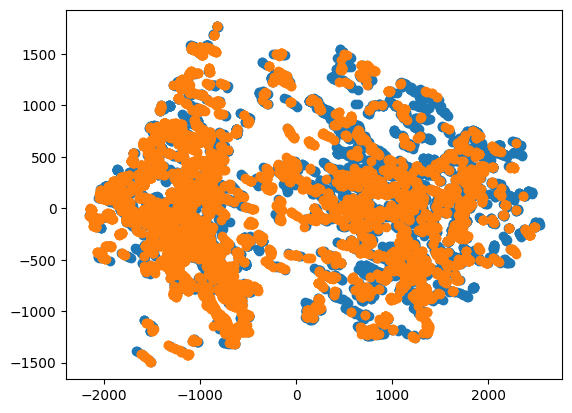

In [ ]:
VisualizingDataset(plot_data, cloud_labels)